In [3]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from pathlib import Path
from keras.models import load_model

from config import config

from src.trading_evaluation.day_by_day_strategy import run_trading_simulation
from src.trading_evaluation.trading_plots import plot_portfolio_comparison


df_btc = pd.read_csv(
    config.DATA_DIR / "processed" / "crypto_prices" / "btc_original.csv",
    parse_dates=["date"],
    index_col="date",
)
df_eth = pd.read_csv(
    config.DATA_DIR / "processed" / "crypto_prices" / "eth_original.csv",
    parse_dates=["date"],
    index_col="date",
)

# load predictions
df_pred_btc = pd.read_csv(
    config.DATA_DIR / "predictions" / "log_price_change_predictions_btc.csv",
    parse_dates=["date"],
    index_col="date",
)
df_pred_eth = pd.read_csv(
    config.DATA_DIR / "predictions" / "log_price_change_predictions_eth.csv",
    parse_dates=["date"],
    index_col="date",
)

# slice original df with index of pred
df_btc = df_btc.loc[df_pred_btc.index]
df_eth = df_eth.loc[df_pred_eth.index]

[BUY] 0.000020 BTC at 48936.61 on 2021-12-21 00:00:00
[SELL] 0.000020 BTC at 50429.86 on 2021-12-25 00:00:00
[SELL] 0.000001 BTC at 50809.51 on 2021-12-26 00:00:00
[SELL] 0.000000 BTC at 50640.42 on 2021-12-27 00:00:00
[SELL] 0.000000 BTC at 47588.86 on 2021-12-28 00:00:00
[SELL] 0.000000 BTC at 46444.71 on 2021-12-29 00:00:00
[SELL] 0.000000 BTC at 47178.13 on 2021-12-30 00:00:00
[SELL] 0.000000 BTC at 46306.45 on 2021-12-31 00:00:00
[SELL] 0.000000 BTC at 47686.81 on 2022-01-01 00:00:00
[SELL] 0.000000 BTC at 47345.22 on 2022-01-02 00:00:00
[SELL] 0.000000 BTC at 46458.12 on 2022-01-03 00:00:00
[SELL] 0.000000 BTC at 45897.58 on 2022-01-04 00:00:00
[SELL] 0.000000 BTC at 43569.00 on 2022-01-05 00:00:00
[SELL] 0.000000 BTC at 43160.93 on 2022-01-06 00:00:00
[BUY] 0.000024 BTC at 41557.90 on 2022-01-07 00:00:00
[SELL] 0.000023 BTC at 43177.40 on 2022-01-15 00:00:00
[SELL] 0.000001 BTC at 43113.88 on 2022-01-16 00:00:00
[SELL] 0.000000 BTC at 42250.55 on 2022-01-17 00:00:00
[SELL] 0.000

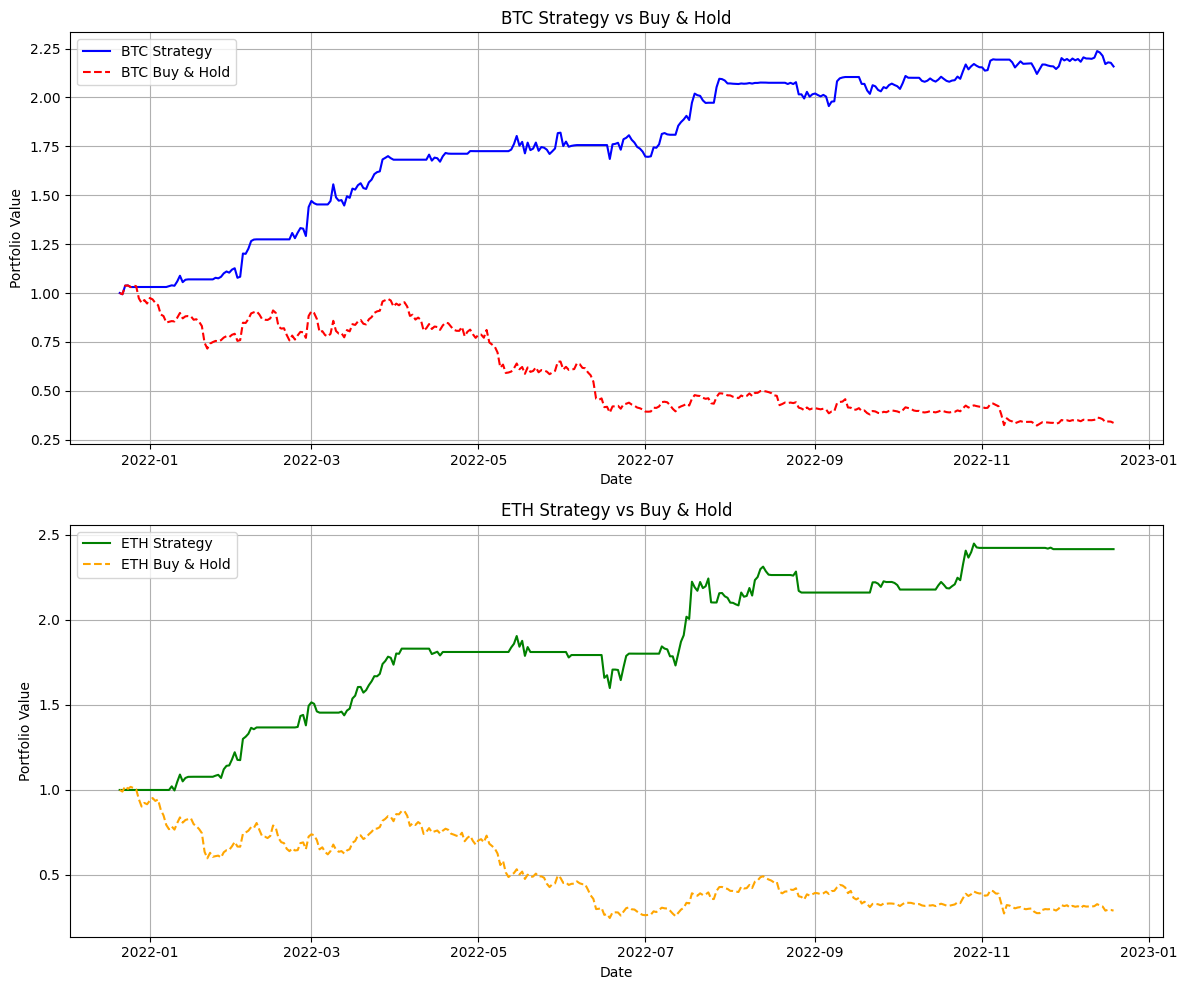

In [4]:
portfolio_btc = run_trading_simulation(
    df_pred=df_pred_btc,
    price_df=df_btc,
    crypto_symbol="BTC",
    initial_capital=1.0,
    trade_amount=1.0,
    verbose=True,
)
df_portfolio_btc = pd.DataFrame({"Portfolio Value": portfolio_btc["portfolio_values"]})
df_portfolio_btc.index = df_btc.index[: len(df_portfolio_btc)]

portfolio_eth = run_trading_simulation(
    df_pred=df_pred_eth,
    price_df=df_eth,
    crypto_symbol="ETH",
    initial_capital=1.0,
    trade_amount=1.0,
    verbose=True,
)
df_portfolio_eth = pd.DataFrame({"Portfolio Value": portfolio_eth["portfolio_values"]})
df_portfolio_eth.index = df_eth.index[: len(df_portfolio_eth)]


plot_portfolio_comparison(
    df_portfolio_btc,
    df_portfolio_eth,
    df_btc,
    df_eth,
    strategy_label_btc="BTC Strategy",
    strategy_label_eth="ETH Strategy",
)